In [1]:
# load -> clean -> features -> fit/validate -> predict -> submit
from linear_model_base import RidgeRegression
import numpy as np

In [3]:
from data_cleaner import Data_Cleaner

#80/20 train test split to verify predictions before upload

data_cleaner_train = Data_Cleaner("C:/Users/Tim/Documents/GitHub/MLProject1/project1/data/train.csv")
data_cleaner_train.tX = data_cleaner_train.tX[:200000,:]
data_cleaner_train.y = data_cleaner_train.y[:200000]

data_cleaner_train._fill_with_NaN()
data_cleaner_train.replace_with_zero()

data_cleaner_test = Data_Cleaner("C:/Users/Tim/Documents/GitHub/MLProject1/project1/data/train.csv")
data_cleaner_test.tX = data_cleaner_test.tX[200000:,:]
data_cleaner_test.y = data_cleaner_test.y[200000:]

data_cleaner_test._fill_with_NaN()
data_cleaner_test.replace_with_zero()

In [4]:
def build_interactions(x):
    x_out = np.array(x)
    for i in range(int(x.shape[1])):
        x_i = x[:,0]
        x = np.delete(x, 0, 1)
        x_interact = (x_i*x.T).T
        
        x_out = np.hstack([x_out,x_interact])
        
    return x_out

def build_poly(x, degree, add_degree_zero=False):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    if add_degree_zero:
        xN = np.hstack([np.ones([x.shape[0],1]),x])
    else:
        xN = x
    if degree>0:
        for i in range(degree-1):
            xN = np.hstack([xN, x**(i+2)])
    return np.array(xN)

In [5]:
data_cleaner_train.tX = build_poly(data_cleaner_train.tX,2)
data_cleaner_train.tX = build_interactions(data_cleaner_train.tX)

[ True  True  True  True False  True False False  True  True False False
 False  True False False  True False False  True False  True False  True
 False False  True False False  True]


In [ ]:
data_cleaner_train.tX = build_poly(data_cleaner_train.tX,2)
data_cleaner_train.tX = build_interactions(data_cleaner_train.tX)

In [5]:
data_cleaner_train.tX.shape

(200000, 1830)

In [5]:
minimum, maximum = data_cleaner_train.getMinMax()
data_cleaner_train.standardize()

In [7]:
from linear_model_base import RidgeRegression
import numpy as np 

Model = RidgeRegression(data_cleaner_train)
search_space = np.logspace(-10, 0, 10)
    
rmse_te = []
rmse_tr = []

for lambda_ in search_space:
        
    tr, te = Model.cross_validation(5, lambda_=lambda_)
    rmse_te.append(te)
    rmse_tr.append(tr)
        
    print("lambda {}".format(lambda_))  

lambda 1e-10
lambda 1.2915496650148826e-09
lambda 1.6681005372000592e-08
lambda 2.1544346900318867e-07
lambda 2.782559402207126e-06
lambda 3.5938136638046256e-05
lambda 0.0004641588833612782
lambda 0.005994842503189421
lambda 0.07742636826811278
lambda 1.0


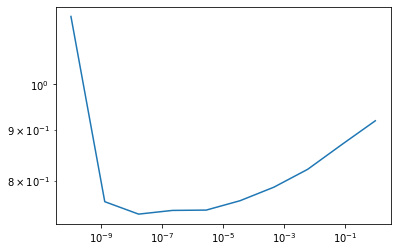

In [13]:
import matplotlib.pyplot as plt
plt.loglog(np.logspace(-10, 0, 10),rmse_te)

In [8]:
best_lambda = search_space[np.where(rmse_te==np.min(rmse_te))]

In [6]:
from linear_model_base import RidgeRegression
import numpy as np 

Model = RidgeRegression(data_cleaner_train)
search_space = np.logspace(-9, -5, 30)
    
rmse_te = []
rmse_tr = []

for lambda_ in search_space:
        
    tr, te = Model.cross_validation(5, lambda_=lambda_)
    rmse_te.append(te)
    rmse_tr.append(tr)
        
    print("lambda {}".format(lambda_))  

lambda 1e-09
lambda 1.373823795883261e-09
lambda 1.8873918221350994e-09
lambda 2.592943797404667e-09
lambda 3.5622478902624368e-09
lambda 4.893900918477499e-09
lambda 6.723357536499335e-09
lambda 9.236708571873846e-09
lambda 1.2689610031679234e-08
lambda 1.743328822199987e-08
lambda 2.395026619987486e-08
lambda 3.290344562312671e-08
lambda 4.5203536563602405e-08
lambda 6.210169418915617e-08
lambda 8.531678524172814e-08
lambda 1.1721022975334794e-07
lambda 1.6102620275609392e-07
lambda 2.2122162910704503e-07
lambda 3.0391953823131946e-07
lambda 4.1753189365604003e-07
lambda 5.736152510448681e-07
lambda 7.880462815669904e-07
lambda 1.0826367338740541e-06
lambda 1.487352107293512e-06
lambda 2.0433597178569395e-06
lambda 2.8072162039411756e-06
lambda 3.856620421163472e-06
lambda 5.298316906283702e-06
lambda 7.2789538439831465e-06
lambda 1e-05


In [7]:
best_lambda = search_space[np.where(rmse_te==np.min(rmse_te))]

In [8]:
weights = Model._run(lambda_ = best_lambda)

In [9]:
from proj1_helpers import *
#generate poly features and standardise according to min_max from training
data_cleaner_test.tX = build_poly(data_cleaner_test.tX,2)
data_cleaner_test.tX = build_interactions(data_cleaner_test.tX )
data_cleaner_test.tX = (data_cleaner_test.tX - minimum) / (maximum - minimum)

In [10]:
Model = RidgeRegression(data_cleaner_test)
weights = Model._run(lambda_ = best_lambda)

y_pred = predict_labels(weights, data_cleaner_test.tX)

In [11]:
#estimate accuracy based on test set
def estimate_Leaderboard_score(y_true,weights,data):
    """Helper function estimating the categorical accuracy on the leaderscore
    """
    y_pred = predict_labels(weights, data)
    N_tot = y_pred.shape[0]
    N_true = len(np.where(y_pred == y_true)[0])
    categorical_acuracy = N_true/N_tot
    return categorical_acuracy

estimate_Leaderboard_score(data_cleaner_test.y, weights, data_cleaner_test.tX)

0.82982

In [12]:
#generate predictions
data_cleaner_upload = Data_Cleaner("C:/Users/Tim/Documents/GitHub/MLProject1/project1/data/test.csv")
data_cleaner_upload._fill_with_NaN()
data_cleaner_upload.replace_with_zero()
data_cleaner_upload.tX = build_poly(data_cleaner_upload.tX,2)
data_cleaner_upload.tX = build_interactions(data_cleaner_upload.tX)
data_cleaner_upload.tX = (data_cleaner_upload.tX - minimum) / (maximum - minimum)

y_pred = predict_labels(weights, data_cleaner_upload.tX)
create_csv_submission(data_cleaner_upload.ids, y_pred, "C:/Users/Tim/Documents/GitHub/MLProject1/project1/data/poly2interactionsRidge.csv")

In [13]:
data_cleaner_upload.tX.shape

(568238, 1830)